# Section 2.2 — Multiple random variable

This notebook contains all the code examples from [Section 2.2 Multiple random variables]() in the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Define dataset

In [4]:
200/8

25.0

In [5]:
35*20

700

In [6]:
# manually adjust `sigmaN` until `prod["n"].std()` in the next cell ~100

In [7]:
from scipy.stats.distributions import norm

m = 700

# temperature is normally distrubted around 20 with std 2
rvT = norm(20,2)
ts = rvT.rvs(m)

# kombucha volume normally distr
meanN = 1000 + (ts-rvT.mean())*35
sigmaN = 75
rvN = norm(meanN, sigmaN)

ns = rvN.rvs(m)


# sns.displot(x=ns, y=ts)

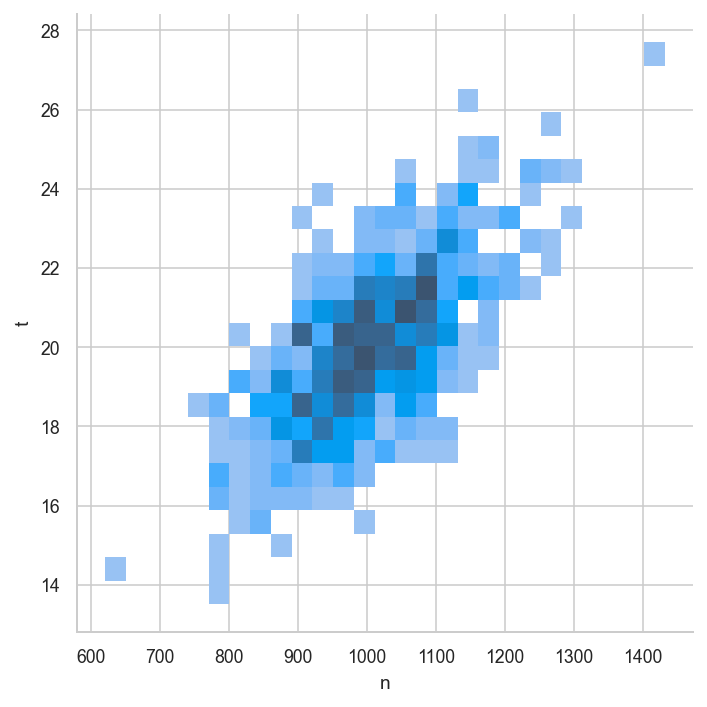

In [8]:
kprod = pd.DataFrame({"t":ts, "n":ns})
sns.displot(data=kprod, x="n", y="t")

In [9]:
# check data
# ns.shape
# kprod["t"]
# kprod["n"] # came from the numpy array `ns`

In [10]:
kprod["n"].std()

100.7280828876444

In [11]:
kprod["n"].mean()

1005.0907538677609

In [12]:
# # save data to kprod.csv
# kprod.to_csv("../datasets/kprod.csv")

## Kombuncha production dataset

Let's say have collected the data from the kombucha bottling plant from past month.
You have a sample of $m=1000$ observations of two variables:
- `t`: the temperature in C
- `n`: the volume of kombucha that went into the bottle

You have a suspicion that the bottling temperature might be causing a variation in the volume.

You want to use "data science" to check if a relationship between $t$ and $n$ exists,
and if it exists you want to use it to your advantage to improve the reliability of the kombucha bottling process.

Recall that your distributor only pays for bottles that are within "spec" (mean of 1000 +/- 2 times std = $[800,1200]$),
and the current bottling process only produces "up to spec" bottles only ... percent of the time.

If there is a relationship between temperature `t` and bottled volume `n` then we should be able to find it if we collect lots of `(t,n)` data observations from the bottling process.

In [13]:
kprod = pd.read_csv("../datasets/kprod.csv")
kprod

,Unnamed: 0,t,n
0,0,20.993428,995.565764
1,1,19.723471,1068.997191
2,2,21.295377,992.512421
3,3,23.046060,1000.977493
4,4,19.531693,866.862076
...,...,...,...
695,695,19.380907,992.182772
696,696,20.652266,921.794840
697,697,17.497773,839.550997
698,698,21.848054,1154.712934


In [14]:
kprod.describe()

,Unnamed: 0,t,n
count,700.00000,700.000000,700.000000
mean,349.50000,19.983708,1005.090754
std,202.21688,1.971220,100.728083
min,0.00000,13.517465,619.673850
25%,174.75000,18.610773,937.563085
50%,349.50000,19.997141,1002.065427
75%,524.25000,21.266132,1073.863544
max,699.00000,27.705463,1431.935309


## Plots inspired by seaborn docs


In [15]:
# penguins = sns.load_dataset("penguins")


In [ ]:
sns.displot(data=kprod, x="n", y="t")

In [ ]:
sns.displot(data=kprod, x="n", y="t", kind="kde")

In [ ]:
# # ALT 1. fewer levels
# sns.displot(data=kprod, x="n", y="t", kind="kde", thresh=.2, levels=4)

In [ ]:
# # ALT 2. specific levels
# sns.displot(data=kprod, x="n", y="t", kind="kde", levels=[.01, .05, .1, .8])

In [ ]:
sns.jointplot(data=kprod, x="n", y="t", kind="kde")

In [ ]:
g = sns.JointGrid(data=kprod, x="n", y="t")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)


In [ ]:
sns.displot(data=kprod, x="n", y="t", kind="kde", rug=True)

## Other 3D and surface plot examples

In [ ]:
# tslices = [18, 20, 22]


# # RSCH: how to get slice at t of the kde approx surface of kprod data as a function

# # verts[i] is a list of (x, y) pairs defining polygon i.
# verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
# facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

# poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
# ax.add_collection3d(poly, zs=lambdas, zdir='y')

# ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
#        xlabel='x', ylabel=r'$\lambda$', zlabel='probability')


In [ ]:
# via https://matplotlib.org/stable/gallery/mplot3d/polys3d.html

from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()

In [ ]:
# verts[0]

In [ ]:
# via https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline




fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

# Plot a basic wireframe
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax1.set_title('row step size 10, column step size 10')

ax2.plot_wireframe(X, Y, Z, rstride=20, cstride=20)
ax2.set_title('row step size 20, column step size 20')

plt.show()




In [ ]:
# via https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.14-Contour-Plots/

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline


x = np.arange(0, 10.0, 0.01)
y = np.arange(0, 10.0, 0.01)

X, Y = np.meshgrid(x, y)

Z = np.sin(X)*np.cos(Y)

fig, ax = plt.subplots(figsize=(6,6))

# ax.contourf(X,Y,Z)
ax.contour(X,Y,Z)

plt.show()



In [ ]:
# via https://stackoverflow.com/questions/16024677/generate-correlated-data-in-python-3-3

import numpy as np
import matplotlib.pyplot as plt


num_samples = 400

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate the random samples.
rng = np.random.default_rng()
y = rng.multivariate_normal(mu, r, size=num_samples)


# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(y[:,0], y[:,1], 'b.', alpha=0.25)
plt.plot(mu[0], mu[1], 'ro', ms=3.5)
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(y[:,0], y[:,2], 'b.', alpha=0.25)
plt.plot(mu[0], mu[2], 'ro', ms=3.5)
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y[:,1], y[:,2], 'b.', alpha=0.25)
plt.plot(mu[1], mu[2], 'ro', ms=3.5)
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
linalg = np.linalg
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[0.3, 0.2], [0.2, 0.2]]

L = linalg.cholesky(cov)
# print(L.shape)
# (2, 2)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 1]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
# print(correlated.shape)
# (2, 1000)
plt.scatter(correlated[0, :], correlated[1, :], c='green')
plt.show()

In [ ]:
# via https://stackoverflow.com/questions/16024677/generate-correlated-data-in-python-3-3

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
linalg = np.linalg
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[1.0, 0.2], [0.2, 1.0]]

L = linalg.cholesky(cov)

rhos = []
for i in range(1000):
    uncorrelated = np.random.standard_normal((num_variables, num_samples))
    correlated = np.dot(L, uncorrelated)
    X, Y = correlated
    rho, pval = stats.pearsonr(X, Y)
    rhos.append(rho)

plt.hist(rhos)
plt.show()

In [ ]:
# via https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

from scipy.stats import multivariate_normal

x = np.linspace(0, 5, 10, endpoint=False)

y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)

fig1 = plt.figure()

ax = fig1.add_subplot(111)

ax.plot(x, y)

In [ ]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]

pos = np.dstack((x, y))

mu = [0.5, -0.2]
Sigma = [[2.0, 0.7], [0.7, 0.5]]
rv = multivariate_normal(mu, Sigma)


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [ ]:
rv.pdf(pos)

In [ ]:
sns.histplot(x=x[0], y=y[0])

### Coin tosses for n=100, n=1000, and n=10000

In [ ]:
import numpy as np
np.random.seed(15)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvC = randint(0, 2)


filename = "figures/panel_n_coin_flips.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 100
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 1000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 10000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Dice rolls 600 6000 60000

In [ ]:
import numpy as np
np.random.seed(5)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvD = randint(1, 7)


filename = "figures/panel_n_dice_rolls.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 600
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 6000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 60000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)
